<a href="https://colab.research.google.com/github/sejin-sim/Hands_On_ML/blob/master/%5B%ED%95%B8%EC%A6%88%EC%98%A8%5D_Chapter9_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5(unsupervised_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-  비지도 학습 : 레이블이 없는 데이터를 사용하여 학습을 시킨다.

- 군집(clustring) : 비슷한 샘플을 클러스터로 모은다. 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소등에 사용할 수 있는 도구

- 이상치 탐지(outlier detection) : 정상인 데이터를 학습한 뒤 비정상 샘플을 감지하는데 사용. ex) 제조 라인에서 결함제품을 감지하거나 시계열 데이터에서 새로운 트렌드를 찾는다.

- 밀도 추정(density estiation) : 데이터셋 생성 확률 과정(random process)의 확률 밀도 함수(probability density fucntion PDF)를 추정. 밀도 추정은 이상치 탐지에 널리 사용 된다. 밀도가 낮은 영역 샘플이 이상치일 확률 높다.

## 1. 군집
1. 군집(clsutring) : 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업

2. 분류는 레이블이 있는 것과 다르게 군집은 레이블이 없다.

<img src= "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbSVFLs%2FbtqGkQCn2LW%2FNGF1SLXSutLfSawGZYDIrK%2Fimg.jpg">

3. 군집의 활용
- 고객 분류 : 추천 시스템
- 데이터 분석 : 각 cluster별 따로 분석
- 차원 축소 기법 :친화성(affinity) 측정 가능. 샘플의 특성 벡터를 클러스터 친화성 벡터로 바꾸고 클러스터 갯수만큼을 차원이라고 하면, 원본 특성 벡터보다 이는 저차원이다. 
- 이상치 탐지 : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 제조 분야 결함 감지 및 부정 거래 감지에 활용된다.
- 준지도 학습 : 레이블 샘플이 적다면 군집을 수행하고 동일 클러스터 샘플에 레이블을 전파 할  수 있다. 
- 검색 엔진 : 제시된 이미지와 비슷한 이미지를 찾아 준다. 훈련 된 군집 모델을 사용해 이미지의 클러스터를 찾는다.
-이미지 분할 : 색을 기반으로 픽셀을 클러스터로 모아서 각 픽셀의 색을 클러스터의 평균 색으로 바꾼다. 

4. 클러스터에 대한 보편적인 정의는 따로 없으며, 군집 알고리즘에 따라 다른 종류의 클러스트를 감지한다.

### 1) k-평균
1. 각 cluster의 중심을 찾고 가장 가까운 cluster에 샘플을 할당한다.


In [ ]:
import numpy as np
import os

# %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams.update({"axes.grid" : True})

plt.rcParams["figure.figsize"] = (12,6)
plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정

np.random.seed(42)

# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

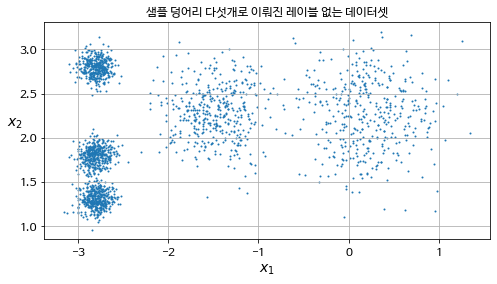

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.title("샘플 덩어리 다섯개로 이뤄진 레이블 없는 데이터셋")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

- 군집에서의 레이블은 알고리즘이 샘플에 할당한 클러스터의 인덱스이다.

In [ ]:
kmeans.cluster_centers_ # 5개의 센트로이드 (즉 클러스터 중심)

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [ ]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

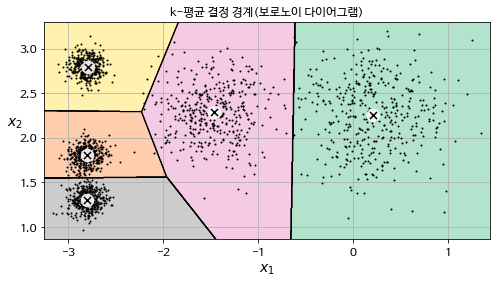

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title("k-평균 결정 경계(보로노이 다이어그램)")
plt.show()

- 하드 군집 : 샘플을 하나의 클러스터(가장 가까운)에 할당하는 것

- 소프트 군집 : 클러스터 마다 샘플에 점수를 부여하는 것
> 유사도 점수 : 샘플과 센트로이드 사이의 거리 = 유클리드 거리

In [ ]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [ ]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

- K-평균 알고리즘

1. 먼저 $k$ 개의 센트로이드를 랜덤하게 초기화 : 데이터셋에서 $k$ 개의 샘플을 랜덤하게 선택하고 센트로이드를 그 위치에 놓는다.

2.  수렴할 때까지 다음을 반복(즉, 센트로이드가 더 이상 이동하지 않을 때까지):
    * 각 샘플을 가장 가까운 센트로이드에 할당
    * 센트로이드에 할당된 샘플의 평균으로 센트로이드를 업데이트

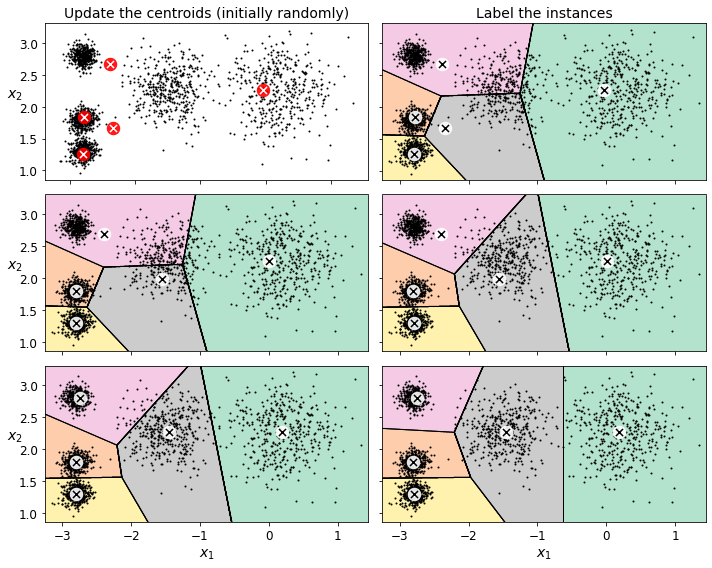

- K-평균의 변동성

1. K-평균 알고리즘에서는 센트로이가 그냥 랜덤하게 초기되고 알고리즘은 단순히 한번씩 반복하여 앞서 본 것처럼 점차 센트로이드를 개선시킴.

2. 이 방식의 문제점은 K-평균을 여러번 (또는 다른 랜덤 시드로) 실행하면 아래에서 보듯이 매우 다른 결과를 얻게된다.

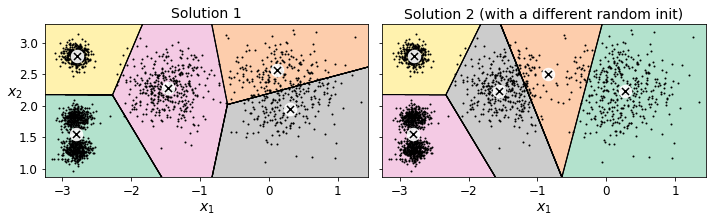

- 센트로이드 초기화 방법

1. 다른 군집 알고리즘을 먼저 실행해서 centroid 위치를 근사하게 파악하는 방법

2. 다른 방법으로는 centroid 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고, 최적의 솔루션을 선택하는 방법
 - 모델의 이너셔(inertia) : 최적의 솔루션 성능 지표로 샘플과 가장 가까운 centroid 사이의 평균 제곱 거리를 의미
 - 이너셔(inertia)가 낮을수록 좋은 모델이다.

- k-평균속도 개선과 미니배치 k-평균
1. 전체 데이터 셋을 사용해 반복하지 않고, 각 반복마다 미니배치를 사용해서 centroid를 조금씩 이동하는 방법
2. 이 알고리즘을 사용하면, 일반적으로 k-means 알고리즘의 속도를 3배에서 4배 정도 높일 수 있다.
3. 다만, 이너셔(inertia)는 일반적으로 k-means 알고리즘보다 안 좋다.
> 특히 cluster의 개수가 증가할 때 위와 같은 현상이 발생한다.

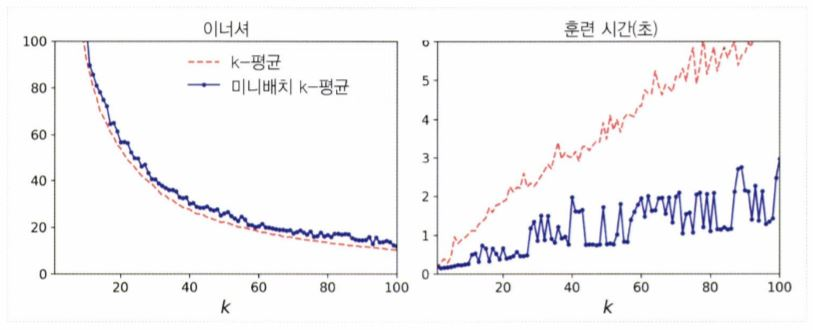

- 최적의 클러스터 개수 찾기

1. 이너셔 그래프를 cluster 개수(k)의 함수로 그렸을 때, 그래프가 꺽이는 지점(Elbow) 찾기

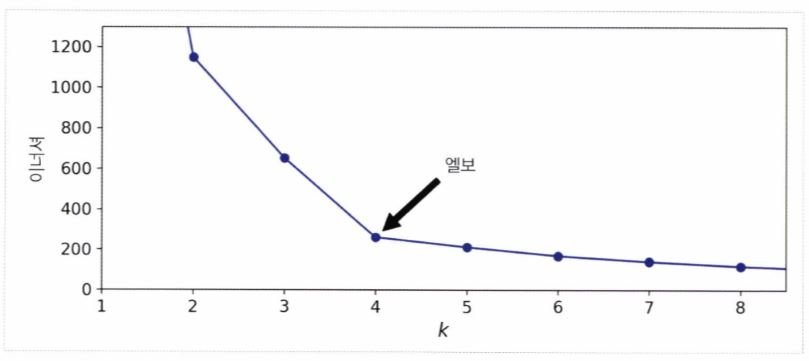


- 그래프를 보면, k가 4까지 증가할 때 이너셔는 빠르게 감소한다.
- 하지만 k가 계속 증가할수록 이너셔의 감소 폭은 크게 줄어드는 것을 알 수 있다.
- 따라서 이 그래프가 꺽이는 지점. 즉, Elbow가 위치한 k 값을 최적의 cluster 개수로 지정해주면 된다.

2. 실루엣 점수 및 실루엣 다이어그램

- 실루엣 점수 : 은 모든 샘플에 대한 실루엣 계수의 평균 값

- 실루엣 계수 = $(b - a) / max(a, b)$
 - a : 동일한 cluster에 있는 다른 샘플까지의 평균 거리 (즉, cluster 내부의 평균 거리)
 - b : 가장 가까운 cluster까지의 평균 거리 (즉, 가장 가까운 cluster의 샘플까지 평균 거리)

- 실루엣 계수의 범위 : -1 ~ + 1
 - +1에 가까운 경우 : 해당 클러스터에 잘 속해있고, 다른 클러스터와 멀리 떨어져 있다.
 - 0에 가까운 경우 : 클러스터 경계에 위치
 - -1에 가까운 경우 : 잘못된 클러스터에 할당 되어 있다.

- 실루엣 다이어그램 : 클러스터와 계숫값으로 정렬 된 그래프
 - 각 cluster마다 칼 모양의 그래프가 그려진다.
 - 칼 모양 그래프의 높이 : Cluster가 포함하고 있는 샘플의 개수
 - 칼 모양 그래프의 너비 : Cluster에 포함된 샘플의 정렬된 실루엣 계수 (따라서 넓을수록 좋음)
 - 수직 파선 : 각 cluster 개수에 해당하는 실루엣 점수

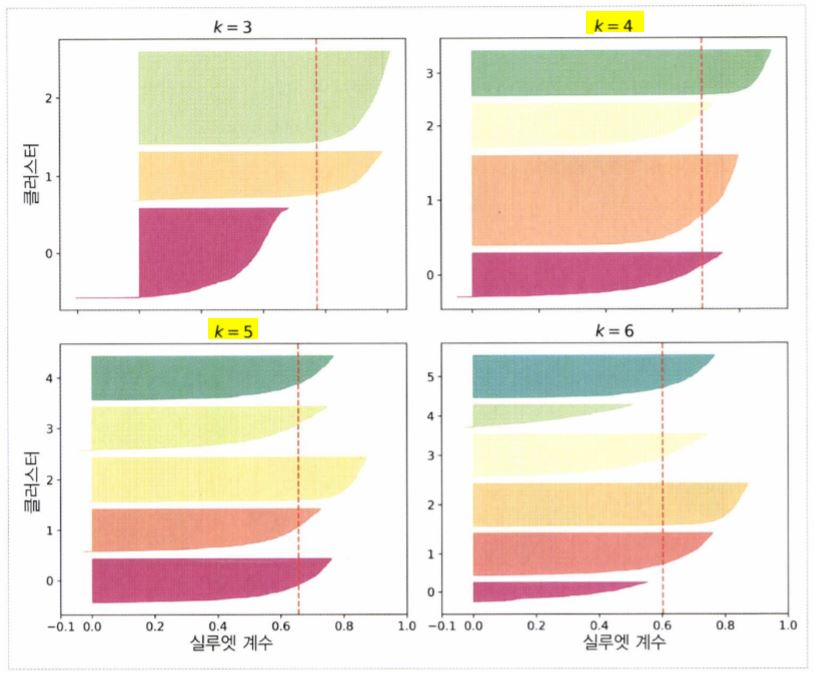

- 대부분의 샘플이 파선을 넘어서 뻗고 있고, 1.0에 근접한 k= 4,5가 좋다.

### 2) k-평균의 한계

1. 장점 : 속도가 빠르고 확장이 용이
2. 단점
 - 최적의 cluster 개수(k)를 직접 지정 필요
 - 최적의 솔루션에 도달하지 못하는 문제를 해결하기 위해 알고리즘을 여러 번 실행 필요
 - cluster의 크기나 밀집도가 서로 다르거나, 원형이 아닐 경우(타원형 등과 같은 경우) 잘 작동하지 않음 → 타원형 cluster에서는 가우시안 혼합 모델(GMM)이 잘 작동
 -  입력 특성의 스케일을 맞춰주는 것은 굉장히 중요

### 3) 군집을 이용한 이미지 분할
1. 이미지 분할 : 이미지를 세그먼트 여러개로 분할하는 작업
2. 시맨틱 분할 : 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당


In [ ]:
# 무당벌레 이미지를 다운로드합니다
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(filename))

('ladybug.png', <http.client.HTTPMessage at 0x7ff9f01a1048>)

In [ ]:
from matplotlib.image import imread
image = imread(os.path.join(filename))
image.shape

(533, 800, 3)

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

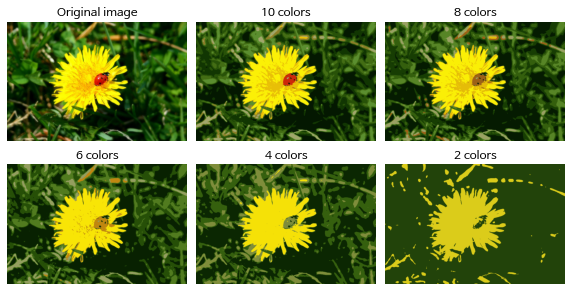

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()


### 4) 군집을 사용한 전처리
- 군집은 차원 축소에 효과적인 방법

### 5) 군집을 사용한 준지도 학습
- 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

### 6) DBSCAN
1. DBSCAN : 밀도 기반 군집화의 대표적인 알고리즘
2. 장점
 - 데이터의 분포가 기하학적으로 복잡한 데이터 셋에도 효과적인 군집화가 가능하다.
 - cluster의 모양과 개수에 상관없이 감지할 수 있는 능력이 뛰어나다.(= 클러스터 수 지정해줄 필요 x) → 이상치에 안정적이다.
3. 단점
 - 데이터 밀도가 자주 변하거나, 아예 모든 데이터의 밀도가 크게 변하지 않으면 성능이 떨어진다.
 - 특성(feature)의 개수가 많으면 성능이 떨어진다.
새로운 샘플에 대해 cluster를 예측할 수 없다. → 사용자가 필요한 예측기를 선택해야 한다.

4. K-means vs DBSCAN



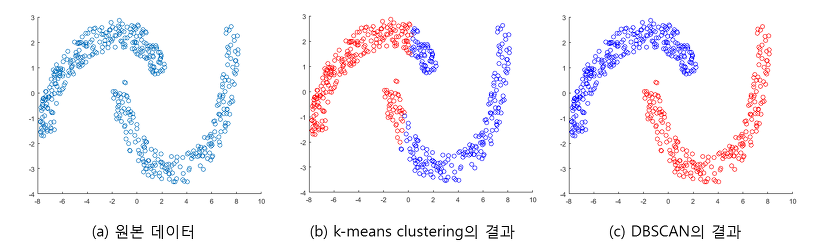

 - k-means : 원의 형태로 클러스터의 모양이 형성
 - DBSCAN : 밀도 기반 알고리즘으로 서로 이웃한 데이터들을 같은 클러스터에 포함시키기 때문에 불특정한 모양의 클러스터가 형성.
 - 결론 : Gaussian 분포(=정규 분포)가 아닌, 불특정한 분포를 따르는 데이터는 밀도 기반 클러스터링 알고리즘 활용이 적절


4. BSCAN 구성 주요 2개 파라미터
- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
사이킷런의 eps 파라미터
- 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
사이킷런의 min_samples 파라미터

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

In [ ]:
dbscan.labels_[ : 10]

- -1은 이상치로 판단 했다는 의미이다.

In [ ]:
len(dbscan.core_sample_indices_) # 핵심 샘플 인덱스

In [ ]:
dbscan.core_sample_indices_[:10]

In [ ]:
dbscan.components_[:3] # 핵심 샘플 자체

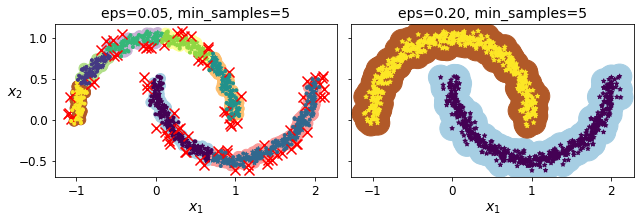

- 왼쪽 그래프는 7개의 클러스트를 만들고 많은 샘플을 이상치로 판단



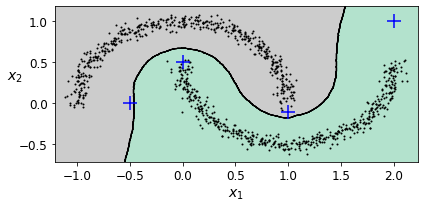

- 두 클러스터 사이의 결정 경계

- 결론 : DBSCAN은 클러스터의 모양과 개수에 상관없이 감지할 수 있지만, 클러스터 간 밀집도가 크게 다르면 올바르게 잡아 내는 것 불가.

### 7) 다른 군집 알고리즘
1. 병합 군집 : 군집 계층을 밑바닥 부터 위로 쌓아 구성. 비슷하게 반복마다 병합 군집은 인접한 클러스터 쌍을 연결한다.

2. BIRCH : 대규모 데이터셋을 위해 고안. 특성 개수(20개 이하)가 많지 않으면, 배치 K-평균보다 빠르고 비슷한 결과를 만든다. 

3. Mean-Shift (평균-이동) : 샘플을 중심으로 원을 그리고 원마다 안에 포함된 모든 샘플의 평균을 구한다. 이후 원의 중심을 평균점으로 이동 시켜 모든 원이 움직이지 않을 때까지 평균-이동을 계속한다. 대규모에 적합 X

4. 유사도 전파 : 투표 방식을 사용. 자신을 대표할 수 있는 비슷한 샘플에 투표. 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성. 대규모에 적합 X

5. 스펙트럼 군집 : 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만든다(차원 축소). 처자원 공간에서 또 다른 군집 알리즘을 사용한다. 


## 2. 가우시한 혼합
1. 가우시안 혼합 모델(GMM) : 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(정규분포)를 가진 데이터 집합들이 섞여서 생성된 것이라 가정 하는 확률 모델

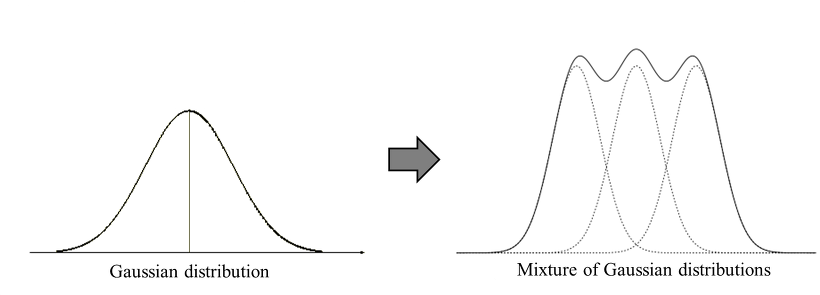

- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 cluster를 형성한다. 일반적으로 이 cluster는 타원형이다.

- 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다르다. 



2. GMM은 x가 발생할 확률을 여러 Gaussian probability density function(가우시안 확률밀도함수 PDF)의 합으로 표현한다.
> 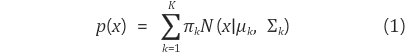

 - $\pi_{k}$(=mixing coefficient)는 $k$번째 Gaussian distribution이 선택될 확률
 - 실수값을 출력하는 확률변수 $X$는 확률변수의 표본값 $k$에 따라 기댓값 $μ_k$, 분산 $Σ_k$이 달라진다.
 
- $\pi_{k}$는 아래의 두 조건을 만족해야 한다.
> image.png
> 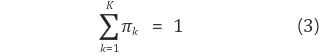

 - GMM을 학습시킨다는 것은 주어진 데이터 $X={x1,x2,...,x_{N}}$에 대하여 적절한 $\pi_{k},\mu_{k},\sum_{k}$를 추정하는 것과 같다.



3. GMM 이용 classification
- GMM 분류 : 데이터 $x_n$가 어떤 Gaussian distribution에서 생성되었는지를 찾는 것. 이를 위해 responsibility $\gamma(z_nk)$를 아래와 같이 정의   
> image.png
> - $z_{nk}∈{0,1}$ 는 $x_n$이 주어졌을 때 GMM의 $k$번째 가우시안 분포가 선택되면 1 or 0의 값인 binary variable(이진 변수)
> - 즉, $z_{nk}$가 1이라는 것은 $x_n$이 $k$번째 가우시안 분포에서 생성되었다는 것을 의미. 
> - GMM을 이용한 분류는 $x_n$이 주어졌을 때, $k$개의 $\gamma(z_{nk})$를 계산하여 가장 값이 높은 가우시안 분포를 선택하는 것 

- 학습을 통해 GMM의 모든 parameter $π,μ,Σ$의 값이 결정 시, 베이즈 정리(Bayes' theorem)을 이용하여 $γ(z_nk)$를 계산 가능
> 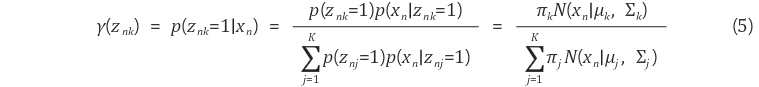
 > - $π_k$ 와 $p(z_{nk}=1)$은 모두 $k$번째 가우시안 분포가 선택될 확률을 나타내기 때문에 $p(z_{nj}=1)$가 $π_j$로 치환되었다.



In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
# 알고리즘이 추정한 파라미터
print("weights(가중치)\n", gm.weights_)
print("\nmeans(평균)\n", gm.means_)
print("\ncovariances(공분산 행렬)\n",gm.covariances_)

weights(가중치)
 [0.39032584 0.20961444 0.40005972]

means(평균)
 [[ 0.05145113  0.07534576]
 [ 3.39947665  1.05931088]
 [-1.40764129  1.42712848]]

covariances(공분산 행렬)
 [[[ 0.68825143  0.79617956]
  [ 0.79617956  1.21242183]]

 [[ 1.14740131 -0.03271106]
  [-0.03271106  0.95498333]]

 [[ 0.63478217  0.72970097]
  [ 0.72970097  1.16094925]]]


4. GMM은 기댓값-최대화(EM) 알고리즘을 사용한다.   
 - E-M STEP을 반복하면서 최적의 파라미터값(=조건부 확률을 최대화 하는)을 찾아가는 흐름.   
 1) 기댓값 단계(E-STEP) : 샘플을 클러스터에 할당한다 = 각 클러스터에 속할 확률(responsiblity)을 예측   
 2) 최대화 단계(M-STEP) : (responsibility가 정확하다고 가정) 클러스터를 업데이터하여 새로운 파라미터값을 얻는다.
> 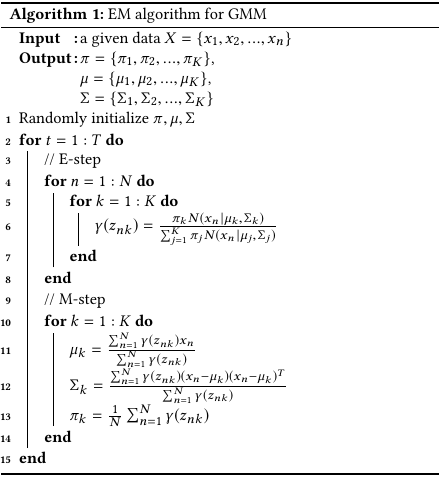

In [ ]:
print("알고리즘이 수렴했는지 =", gm.converged_)
print("반복 횟수 =", gm.n_iter_)

알고리즘이 수렴했는지 = True
반복 횟수 = 4


In [ ]:
gm.predict(X)       # 하드 군집

array([0, 0, 2, ..., 1, 1, 1])

In [ ]:
gm.predict_proba(X) # 소프트 군집

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [ ]:
y_new # 각 클러스터에서 순서대로 샘플링되었습니다.

array([0, 0, 1, 1, 1, 2])

In [ ]:
gm.score_samples(X) # 로그 확률 밀도 함수(PDF)를 추정

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

In [ ]:
# 전체 공간에 대해 이 PDF를 적분하면 1이 되는지 확인
# 결과는 1에 매우 가깝다.

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225098

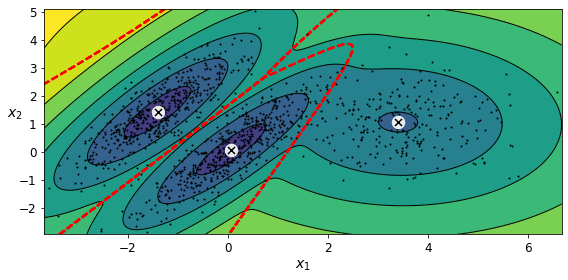

- 위 그래프는 훈련된 가우시안 혼합 모델의 클러스터 평균, 결정 경계, 밀도 등고선을 보여준다.

- 특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적이기 어렵다. → 알고리즘이 학습할 파라미터 개수를 제한해야 합니다.

- 공분산 행렬에 제약을 추가하면 된다.
 1. "full"(기본값): 제약이 없습니다. 모든 클러스터가 어떤 크기의 타원도 될 수 있습니다.
 2. "tied": 모든 클러스터가 동일하지만 어떤 타원도 가능합니다(즉, 공분산 행렬을 공유합니다).
 3. "spherical": 모든 클러스터가 원형이지만 지름은 다를 수 있습니다(즉, 분산이 다릅니다).
 4. "diag": 클러스터는 어떤 크기의 타원도 될 수 있지만 타원은 축에 나란해야 합니다(즉, 공분산 행렬이 대각 행렬입니다).

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

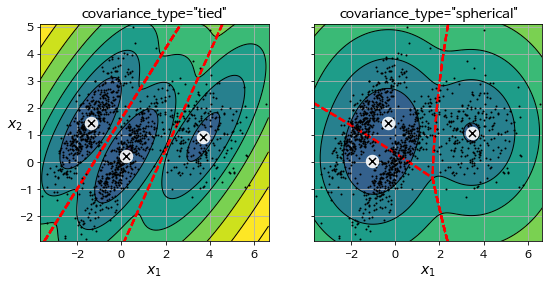

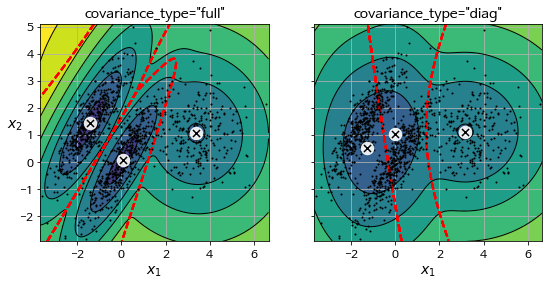

In [ ]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.show()

### 1) 가우시안 혼합을 사용한 이상치 탐지
1. GMM 이상치 탐지 : 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 본다. → 밀도 임계값 필요

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) # 4%를 밀도 임계값으로 사용
anomalies = X[densities < density_threshold]

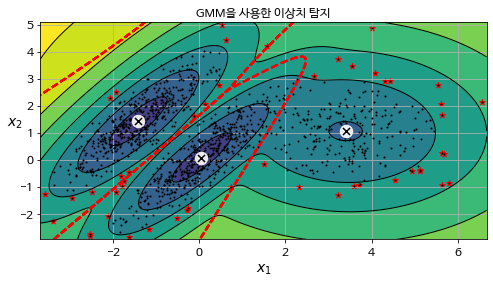

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.title("GMM을 사용한 이상치 탐지")
plt.show()

- 위 그래프에서 이상치가 별 모양으로 표시되어 있습니다.

<br/>

### 2) 클러스터 개수 선택하기
- k평균에서는 이넌셔나 시루엣 점수를 사용하여 클러스터 개수를 선택하지만, 가우시안은 이런 지표가 없다.

1. BIC(bayesian information criterion) 이나 AIC(akaike information criterion)과 같은 이론적 정보 기준을 최소화 하는 모델을 찾는다.


$$ {BIC} = {\log(m)p - 2\log({\hat L})}$$

$${AIC} = 2p - 2\log(\hat L)$$
> - $m$ : 샘플의 개수
> - $p$ : 모델이 학습할 파라미터 개수
> - $\hat{L}$ : 모델의 가능도 함수(likelihood function)의 최대값. 관측 데이터 $\mathbf{X}$의 조건부 확률

2. BIC와 AIC는 모두 학습할 파라미터가 많은 모델에 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더합니다.

In [ ]:
gm.bic(X)

8189.733705221635

In [ ]:
gm.aic(X)

8102.508425106597

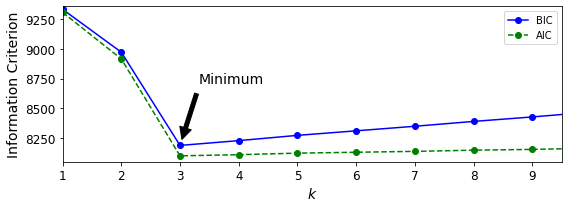

- 여러가지 클러스터 개수 $k$에 대한 AIC 와 BIC. $k=3$이 최선의 선택으로 보인다.

<br/>

### 3) 베이즈 가우시안 혼합 모델
1. 최적의 클러스터 개수를 수동으로 찾는 대신 BayesianGaussianMixture 클래스를 사용해 불필요한 클러스터의 가중치를 0으로 (또는 0에 가깝게) 만들 수 있다.  
2. 최적의 클러스터 개수보다 큰 컴포넌트(n_componets)의 개수를 지정하면 된다. 이 알고리즘은 자동으로 불필요한 클러스터를 제거한다.
3. 클러스터 파라미터(가중치, 평균, 공분산 행렬 등)는 고정된 모델 파라미터가 아닌 잠재 확률 변수로 취급


In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
# 클러스터 개수를 10으로 설정하고 결과를 확인해 보자.

bgm.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [ ]:
print(np.round(bgm.weights_, 2)) # 3개의 클러스터가 필요하다는 것을 감지함.

[0.4  0.   0.   0.   0.39 0.2  0.   0.   0.   0.  ]


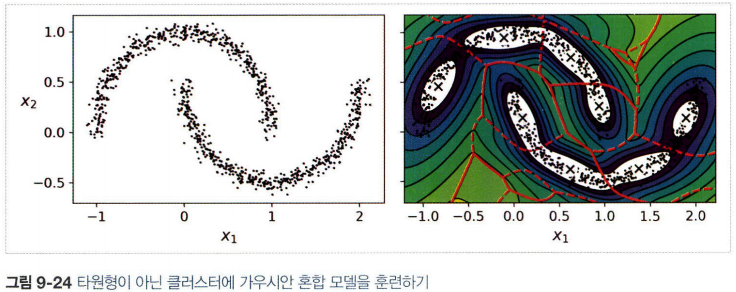

- 타원형 클러스터에 잘 작동하나 다른 모양을 가진 데이터셋에는 좋지 못하다.

### 4) 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

1. PCA(그리고 inverse_transform() 메서드를 가진 다른 차원 축소 기법): 샘플의 재구성 오차와 이상치의 재수겅 오차를 비교하면 일반적으로 후자가 크다. 이를 이용하여 이상치 탐지

2. Fast-MCD(minimum covariance determinant): EllipticEnvelope 클래스에서 구현. 데이터셋을 정제할 때 사용. 샘플(정상치)가 하나의 가우시안 분포에서 생성되었다고 가정하고 이 가우시안 분포에서 생성되지 않은 이상치로 이 데이터셋이 오염되었다고 가정. 가우시안 분포의 파라미터를 추정할 때 이상치로 의심되는 샘플을 무시

3. 아이솔레이션 포레스트: 고차원 데이터셋에서 이상치 감지를 위한 알고리즘. 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트 생성. 모든 샘플이 다른 샘플과 격리될 때까지 진행하고 다른 샘플과 멀리 떨어져있는 샘플을 이상치로 판단. 평균적으로 정상 샘플과 적은 단계에서 격리

4. LOF(local outlier factor): 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교

5. one-class SVM : 특이치 탐지에 사용. SVM이지만 클래스가 하나. 원본 공간으로부터 고차원 공간에 있는 샘플을 분리(원본 공간에서는 모든 샘플을 둘러싼 작은 영역을 찾는 것). 새로운 샘플이 이 영역 안에 놓이지 않는 다면 이는 이상. 고차원 데이터셋에 잘 작동하나 대규모 데이터셋으로 확장은 어렵다.